<a href="https://colab.research.google.com/github/KrysnaRachmatR/PCVK_GANJIL_2023/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pytesseract

In [2]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from google.colab.patches import cv2_imshow

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
atas.

In [7]:
def threshold(image, t):
  #inisialisasi hasil matriks
  result = np.zeros(image.shape, dtype=np.uint8)

  #Thresholding
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      if image[i][j] > t:
        result[i][j] = 255
      else:
          result[i][j] = image[i][j]

          return result

In [13]:
image = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/image_thres/gradient.jpg')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


#Thresholding Binary
binary = threshold(gray_image, 170)

#Thresholding BINARY_INV
binary_inv = 255 - threshold(gray_image, 170)

#Thresholding TRUNC
trunc = threshold(gray_image, 170)

#Thresholding TOZERO
tozero = threshold(gray_image, 170)
tozero[tozero == 255] = 0

#Thresholding TOZERO_INV
tozero_inv = 255 - threshold(gray_image, 170)
tozero_inv[tozero_inv == 255] = 0

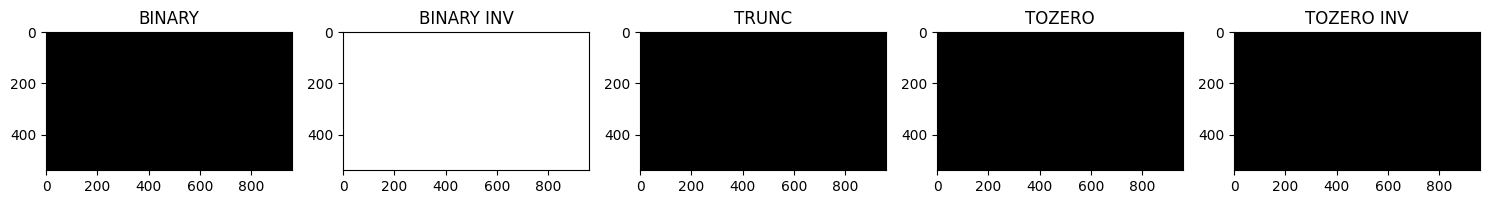

In [14]:
plt.figure(figsize=(15,6))

plt.subplot(151)
plt.imshow(binary, cmap='gray')
plt.title('BINARY')

plt.subplot(152)
plt.imshow(binary_inv, cmap='gray')
plt.title('BINARY INV')

plt.subplot(153)
plt.imshow(trunc, cmap='gray')
plt.title('TRUNC')

plt.subplot(154)
plt.imshow(tozero, cmap='gray')
plt.title('TOZERO')

plt.subplot(155)
plt.imshow(tozero_inv, cmap='gray')
plt.title('TOZERO INV')

plt.tight_layout()
plt.show()